# Финальное задание курса

В итоговом задании курса мы предлагаем вам решить задачу регрессии - по характеристикам поездок на такси в Нью-Йорке научиться определять их стоимость.

В задании две части:

* первая часть - обычная. Так устроены все ноутбуки с домашними заданиями в курсе. Мы что-то просим - вы делаете. Задания этой части как обычно проверяются тестами на Stepik

* вторая часть - творческая. В этой части мы даем вам лишь идеи того, что можно сделать, а все остальное - на вас. Это задание проверяется в виде текстового отчета (подробности смотрите в описании второй части задания)

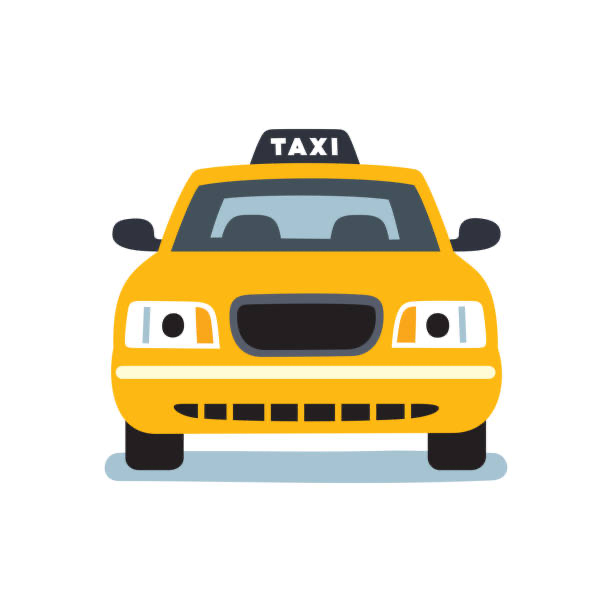

# Часть 1

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Считаем данные

In [4]:
df = pd.read_csv("https://www.dropbox.com/s/glmbcyopi24m2ni/final_project_data.csv?dl=1")

df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2011-11-23 14:36:35.0000003,2011-11-23 14:36:35 UTC,-73.959075,40.783316,-73.959087,40.783345,1.0,2.5
1,2013-09-14 21:40:00.00000016,2013-09-14 21:40:00 UTC,-73.931612,40.771060,-73.929097,40.760542,1.0,5.5
2,2012-04-30 18:13:19.0000002,2012-04-30 18:13:19 UTC,-73.997929,40.740983,-74.007197,40.727725,2.0,6.5
3,2010-10-22 15:03:47.0000001,2010-10-22 15:03:47 UTC,-73.980608,40.742449,-73.985609,40.755807,1.0,6.5
4,2011-02-18 18:08:16.0000002,2011-02-18 18:08:16 UTC,-74.008884,40.720314,-73.983280,40.722350,1.0,12.1


## Исследование данных

### Quiz 

Сколько строк в таблице df?

In [ ]:
df.shape

(615962, 8)

### Quiz 

Есть ли пропущенные значения в таблице? В скольких столбцах есть пропуски?

In [ ]:
df.key.min(), df.key.max()

('2009-01-01 00:16:17.0000003', '2015-06-30 23:49:50.0000004')

### Quiz

Удалите строки с пропущенными значениями из таблицы. Сколько строк осталось в таблице?

In [3]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
fare_amount          0
dtype: int64

In [ ]:
df.shape

(615959, 8)

Удалите из данных колонку `key`, так как в ней дублируется информация из `pickup_datetime`

In [ ]:
df.drop(columns='key', inplace=True)

Обработайте колонку `pickup_datetime`. Выделите из нее 4 новых столбца:

* `year` - год поездки
* `month` - месяц поездки
* `day` - день поездки
* `hour` - час поездки. Час вычисляйте так: если до следующего часа осталось меньше 30 минут (на секунды не смотрим), что час округляете до следующего.

Пример: 14:18:20 -> 14 часов, 17:48:29 -> 18 часов

Затем удалите столбец `pickup_datetime`.

 

In [ ]:
 df['pickup_timestamp'] = pd.to_datetime(df.pickup_datetime)

In [ ]:
df['year'] = df.pickup_timestamp.dt.year

In [ ]:
df['month'] = df.pickup_timestamp.dt.month

In [ ]:
df['day'] = df.pickup_timestamp.dt.day

In [ ]:
df['hour'] = df.pickup_timestamp.map(lambda x: x.hour if x.minute < 30 else (x + pd.to_timedelta('0 days 01:00:00')).hour)

## Вопросы по данным

### Quiz

В какие годы совершались поездки?

In [ ]:
df.year.value_counts()

2012    99060
2011    97898
2013    96329
2009    94465
2010    93419
2014    92051
2015    42737
Name: year, dtype: int64

### Quiz

В какой час было совершено больше всего поездок?

In [ ]:
df.hour.value_counts()

19    38581
20    37567
21    35715
22    34939
18    34816
23    32521
15    31062
14    30516
12    30036
13    30015
9     28816
10    27874
11    27794
0     27586
16    27336
17    26489
8     25918
1     20848
7     17696
2     15683
3     11413
4      8816
6      8302
5      5620
Name: hour, dtype: int64

Признаки `month`, `day`, `hour` - категориальные (подумайте почему!)

Поэтому их можно попробовать закодировать.

Попробуем подход: группировка значений признака + дальнейшая OneHot-кодировка.

* Создайте колонки `winter`, `spring`, `summer`, `autumn` - в каждую из которых пишите 1, если месяц относится к сезону, и 0 иначе.

* Создайте колонки `start_month`, `middle_month`, `end_month` - в каждую колонку пишите 1, если день относится к началу месяца (1-10 число), середине месяца (11-20 число), концу месяца (от 21 числа), и 0 иначе.

* Создайте колонки `night`, `morning`, `day`, `evening` по аналогии. Если час - от 23 до 5, то это `night`, от 6 до 11 - `morning`, от 12 до 16 - `day`, от 17 до 22 - `evening`.

После создания новых колонок удалите колонки `month`, `day`, `hour`.

P.S. Отдельно делайте преобразования для X_train и для X_test, чтобы заново не разбивать данные.

### Quiz

В какой сезон (зима, весна, лето, осень) было совершено наименьшее число поездок?

In [ ]:
df.month.value_counts()

3     58039
5     57758
4     56445
6     55417
1     54827
2     52204
10    49656
9     47044
12    46942
7     46723
11    46673
8     44231
Name: month, dtype: int64

In [ ]:
df.month.dtype

dtype('int64')

In [ ]:
df['season'] = df.month.map({12: 'winter', 1: 'winter', 2: 'winter', 3: 'spring', 4: 'spring', 5: 'spring', 6: 'summer', 7: 'summer', 8: 'summer', 9: 'autumn' , 10: 'autumn', 11: 'autumn'})

In [ ]:
df.season.value_counts()

spring    172242
winter    153973
summer    146371
autumn    143373
Name: season, dtype: int64

Постройте scatter plot в осях `pickup_latitude` и `pickup_longitude`

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [ ]:
df.pickup_longitude.value_counts()

 0.000000     11524
-73.137393      178
-73.982220       53
-73.982140       52
-73.982345       52
              ...  
-73.933380        1
-73.783618        1
-74.017344        1
-74.015256        1
-73.961789        1
Name: pickup_longitude, Length: 100586, dtype: int64

### Quiz

Постройте ящик с усами boxplot для `pickup_longitude`. Есть ли на визуализации выбросы? (отдельные точки)

<Axes: >

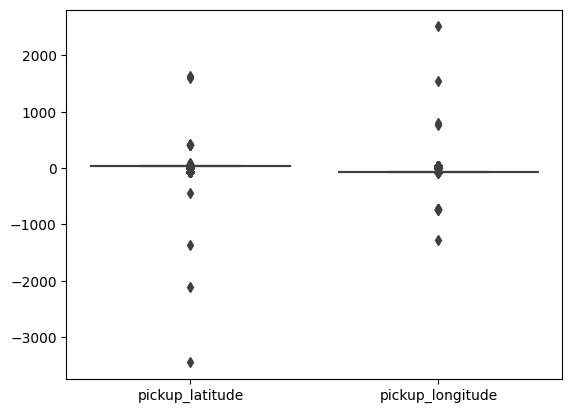

In [ ]:
sns.boxplot(df[['pickup_latitude', 'pickup_longitude']])

### Quiz

Чему равна медиана `pickup_longitude`? Ответ округлите до тысячных.

In [ ]:
df.pickup_longitude.median(axis=0)

-73.981803

Постройте гистограмму распределения признака `hour`.

<Axes: >

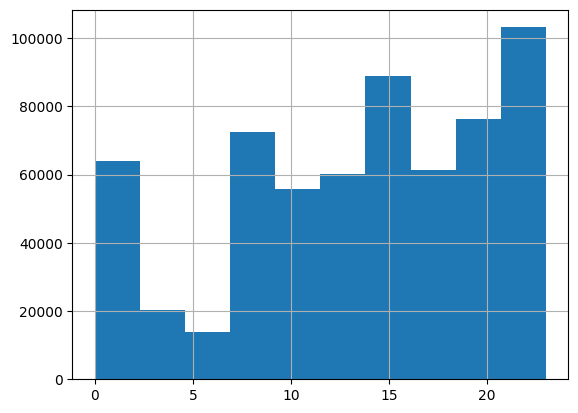

In [ ]:
df.hour.hist()

## Построение baseline-модели

Разбейте `df` на матрицу объект-признак `X` и вектор с целевой переменной `y`. Целевая переменная - столбец `fare_amount`. 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.sample()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,pickup_timestamp,year,month,day,hour,season
445465,2010-09-28 23:14:44 UTC,-73.97021,40.758347,-74.0081,40.713473,1.0,11.7,2010-09-28 23:14:44+00:00,2010,9,28,23,autumn


In [ ]:
X = df.drop(columns=['season', 'pickup_datetime', 'pickup_timestamp', 'fare_amount'])
y = df.fare_amount

Разбейте данные на тренировочную и тестовую части с помощью train_test_split.

Тестовая часть - 25% всех данных, `random_state=42`.

Сколько строк в матрице `X_train`?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(461969, 10)

### Quiz

Обучите решающее дерево глубины 3 на тренировочных данных и вычислите ошибку $R^2$ на тесте. Ответ округлите до сотых. 

Зафиксируйте у дерева `random_state=42`. 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
model_DT = DecisionTreeRegressor(random_state=42, max_depth=3)
model_DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
pred_DT = model_DT.predict(X_test)

In [ ]:
r2_score(y_test, pred_DT)

0.4998349394485503

### Quiz

Постройте гистограмму важности признаков.

Какой признак имеет наибольший вес?

In [ ]:
model_DT.feature_importances_

array([0.31174679, 0.05099006, 0.63726315, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
importances = model_DT.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(model_DT.feature_importances_)), model_DT.feature_importances_)
plt.xticks(range(len(model_DT.feature_importances_)), X.columns, rotation='vertical')
plt.show()

NameError: ignored

## Улучшение модели

### Quiz

Постройте гистограмму распределения целевой переменной `y`, укажите параметр `bins=100`.

Является ли распределение нормальным?

<Axes: >

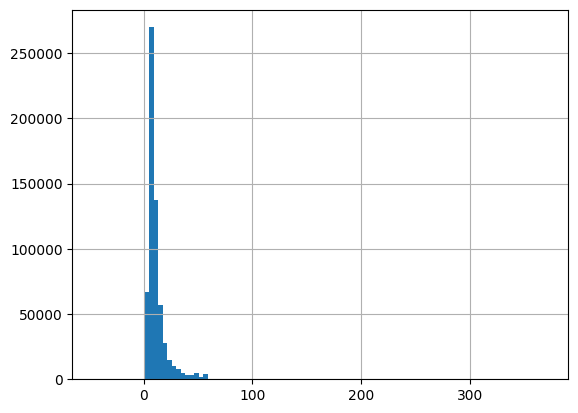

In [ ]:
y.hist(bins=100)

Замените все значения $y$, меньшие 0, на 0.

Сделайте преобразование целевой переменной по правилу $y_{new} = np.log1p(y)$

Заново разбейте данные на тренировочную и тестовую часть по тем же правилам, что и раньше, но теперь используйте `X` и `y_new`.

In [ ]:
y = y.apply(lambda x: x if x >0 else 0)

In [ ]:
y[y<0]

Series([], Name: fare_amount, dtype: float64)

In [ ]:
y_new = np.log1p(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.25, random_state=42)

### Quiz

Заново обучите решающее дерево глубины 3 с `random_state=42` на тренировочных данных и вычислите $R^2$ на тесте. Ответ округлите до сотых.

Перед вычислением $R^2$ сделайте обратное преобразование от прогноза: `np.expm1(pred)` и от `y_test`.

**Важно:** дальше мы будем работать с преобразованной целевой переменной, поэтому при вычислении $R^2$ во всех заданиях ниже делайте обратное преобразование.

In [ ]:
model_DT = DecisionTreeRegressor(random_state=42, max_depth=3)

In [ ]:
model_DT_log.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
# pred_DT_log = model_DT_log.predict(X_test)

In [ ]:
r2_score(np.expm1(y_test), np.expm1(pred_DT_log))

0.4434601265690873

### Quiz


Подберите по кросс-валидации на тренировочных данных глубину дерева в диапазоне от 3 до 10 включительно с шагом 1 (`random_state=42`).

`cv=3, scoring=r2`

Затем примените модель с оптимальной глубиной на тесте и вычислите $R^2$. Ответ округлите до сотых.

Перед вычислением $R^2$ не забудьте (как и дальше) делать преобразование `np.expm1`

3
4
5
6
7
8
9
10


In [ ]:
cross_val_score

In [ ]:
for n in np.arange(3, 11, 1):
  print(n, cross_val_score(DecisionTreeRegressor(max_depth=n), X_train, y_train, cv=3, scoring='r2').mean())

3 0.364623678856403
4 0.41843642164333805
5 0.45815096769249397
6 0.4832603459469647
7 0.5040446137510832
8 0.5283949392099183
9 0.5470663436006316
10 0.5619955277448491


In [ ]:
params = {'max_depth' : np.arange(3, 11, 1)}

gs_dt = GridSearchCV(model_DT_log, params, cv=3, scoring='r2', verbose=2)

gs_dt.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ........................................max_depth=3; total time=   0.9s
[CV] END ........................................max_depth=3; total time=   0.7s
[CV] END ........................................max_depth=3; total time=   0.7s


KeyboardInterrupt: ignored

In [ ]:
gs_dt.best_params_

{'max_depth': 10}

In [ ]:
gs_dt.best_estimator_

DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
gs_dt.best_estimator_.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
y_pred = gs_dt.best_estimator_.predict(X_test)

In [ ]:
r2_score(np.expm1(y_test), np.expm1(y_pred))

0.6898160958310546

In [ ]:
model_DT_final = DecisionTreeRegressor(random_state=42, max_depth=10)

In [ ]:
params = {'max_depth' : np.arange(3, 11, 1)}

gs = GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=3, scoring='r2', verbose=2)

gs.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ........................................max_depth=3; total time=   1.1s
[CV] END ........................................max_depth=3; total time=   0.7s
[CV] END ........................................max_depth=3; total time=   0.7s
[CV] END ........................................max_depth=4; total time=   0.9s
[CV] END ........................................max_depth=4; total time=   0.9s
[CV] END ........................................max_depth=4; total time=   0.8s
[CV] END ........................................max_depth=5; total time=   1.1s
[CV] END ........................................max_depth=5; total time=   1.1s
[CV] END ........................................max_depth=5; total time=   1.1s
[CV] END ........................................max_depth=6; total time=   1.4s
[CV] END ........................................max_depth=6; total time=   1.3s
[CV] END ........................................

GridSearchCV(cv=3,
             estimator=DecisionTreeRegressor(max_depth=10, random_state=42),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='r2', verbose=2)

In [ ]:
gs.best_params_, gs.best_score_

({'max_depth': 10}, 0.5620027283326873)

In [ ]:
model_DT_final = DecisionTreeRegressor(random_state=42, max_depth=10)

In [ ]:
model_DT_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
pred_final = model_DT_final.predict(X_test)

In [ ]:
r2_score(np.expm1(y_test), np.expm1(pred_final))

0.6898160958310546

## Усложнение пайплайна

Создайте pipeline, в котором сначала извлеките полиномиальные признаки степени 2 из данных, а затем обучите решающее дерево глубины 3 с `random_state=42`.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
p1 = Pipeline([
    ('features', PolynomialFeatures(degree=2)),
    ('model', DecisionTreeRegressor(max_depth=3, random_state=42))
])

### Quiz

Обучите pipeline на тренировочных данных, сделайте прогноз на тесте и вычислите $R^2$. Ответ округлите до сотых.

In [ ]:
p1.fit(X_train, y_train)

Pipeline(steps=[('features', PolynomialFeatures()),
                ('model', DecisionTreeRegressor(max_depth=3, random_state=42))])

In [ ]:
my_pred = p1.predict(X_test)

In [ ]:
r2_score(np.expm1(y_test), np.expm1(my_pred))

0.41732314222165756

При помощи GridSearchCV с теми же гиперпараметрами, что и раньше, подберите глубину дерева внутри пайплайна в диапазоне от 3 до 10 включительно с шагом 1.

In [ ]:
p2 = Pipeline([
    ('features', PolynomialFeatures(degree=2)),
    ('model', GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid={'max_depth' : np.arange(3, 11, 1)}, cv=3, scoring='r2'))
])

In [ ]:
p2.fit(X_train, y_train)

Pipeline(steps=[('features', PolynomialFeatures()),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=DecisionTreeRegressor(random_state=42),
                              param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
                              scoring='r2'))])

In [ ]:
preds = p2.predict(X_test)

### Quiz

Выведите $R^2$ лучшего результата на тесте. Ответ округлите до сотых.

In [ ]:
r2_score(np.expm1(y_test), np.expm1(preds))

0.7141308827831071

## Feature selection

Добавьте в предыдущий пайплайн:
* после добавления полиномиальных признаков - StandardScaler
* затем - снижение размерности при помощи метода `SelectFromModel` с моделью `Ridge` с гиперпараметрами по умолчанию. 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge

In [ ]:
p3 = Pipeline([
    ('features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(Ridge())),
    ('model', GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid={'max_depth' : np.arange(3, 11, 1)}, cv=3, scoring='r2', verbose=2)),
])

Обучите пайплайн на тренировочных данных, сделайте прогноз на тесте и вычислите для него $R^2$.

In [ ]:
p3.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ........................................max_depth=3; total time=   1.3s
[CV] END ........................................max_depth=3; total time=   1.3s
[CV] END ........................................max_depth=3; total time=   1.3s
[CV] END ........................................max_depth=4; total time=   2.2s
[CV] END ........................................max_depth=4; total time=   1.8s
[CV] END ........................................max_depth=4; total time=   1.6s
[CV] END ........................................max_depth=5; total time=   2.0s
[CV] END ........................................max_depth=5; total time=   2.0s
[CV] END ........................................max_depth=5; total time=   2.0s
[CV] END ........................................max_depth=6; total time=   2.9s
[CV] END ........................................max_depth=6; total time=   2.6s
[CV] END ........................................

Pipeline(steps=[('features', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('feature_selection', SelectFromModel(estimator=Ridge())),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=DecisionTreeRegressor(random_state=42),
                              param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
                              scoring='r2', verbose=2))])

Подберите глубину решающего дерева в пайплайне, в том же диапазоне и теми же гиперпараметрами GridSearch, что и в предыдущих заданиях.

Вычислите $R^2$ на тестовых данных, ответ округлите до сотых.

In [ ]:
preds = p3.predict(X_test)
r2_score(np.expm1(y_test), np.expm1(preds))

0.6698534940345506

### Quiz

Удалось ли при помощи пайплайна с отбором признаков улучшить результат предыдущей лучшей модели?

## Кодирование категориальных признаков

Признаки `month`, `day`, `hour` - категориальные (подумайте почему!)

Поэтому их можно попробовать закодировать.

Попробуем подход: группировка значений признака + дальнейшая OneHot-кодировка.

* Создайте колонки `winter`, `spring`, `summer`, `autumn` - в каждую из которых пишите 1, если месяц относится к сезону, и 0 иначе.

* Создайте колонки `start_month`, `middle_month`, `end_month` - в каждую колонку пишите 1, если день относится к началу месяца (1-10 число), середине месяца (11-20 число), концу месяца (от 21 числа), и 0 иначе.

* Создайте колонки `night`, `morning`, `day`, `evening` по аналогии. Если час - от 23 до 5, то это `night`, от 6 до 11 - `morning`, от 12 до 16 - `day`, от 17 до 22 - `evening`.

После создания новых колонок удалите колонки `month`, `day`, `hour`.

P.S. Отдельно делайте преобразования для X_train и для X_test, чтобы заново не разбивать данные.

In [ ]:
for el in range(6,12):
  print(el)

6
7
8
9
10
11


In [ ]:
def set_season(df):
  df['season'] = df.month.map({12: 'winter', 1: 'winter', 2: 'winter', 3: 'spring', 4: 'spring', 5: 'spring', 6: 'summer', 7: 'summer', 8: 'summer', 9: 'autumn' , 10: 'autumn', 11: 'autumn'})
  seasons = ('winter', 'spring', 'summer', 'autumn')
  for season in seasons:
    df[season] = df['season'].apply(lambda x: 1 if x == season else 0)
  df.drop(columns=['season', 'month'], inplace=True)

set_season(X_train)
set_season(X_test)

In [ ]:
def set_day(df):
  df['start_month'] = df['day'].apply(lambda x: 1 if x in range(1, 11) else 0)
  df['middle_month'] = df['day'].apply(lambda x: 1 if x in range(11, 21) else 0)
  df['end_month'] = df['day'].apply(lambda x: 1 if x in range(21, 32) else 0)
  df.drop(columns=['day'], inplace=True)

set_day(X_train)
set_day(X_test)

In [ ]:
def set_hour(df):
  df['night'] = df['hour'].apply(lambda x: 1 if x in (23, 24, 0, 1, 2, 3, 4, 5) else 0)
  df['morning'] = df['hour'].apply(lambda x: 1 if x in range(6, 12) else 0)
  df['day'] = df['hour'].apply(lambda x: 1 if x in range(12, 17) else 0)
  df['evening'] = df['hour'].apply(lambda x: 1 if x in range(17, 23) else 0)
  df.drop(columns=['hour'], inplace=True)

set_hour(X_train)
set_hour(X_test)

### Quiz

На сколько признаков стало больше в матрице-объект признак после добавления закодированных категориальных столбцов и удаления исходных категориальных столбцов?

In [ ]:
X_test.shape

(153990, 17)

In [ ]:
X.shape

(615959, 9)

In [ ]:
X_test.shape[1] - X.shape[1]

8

Подберите при помощи GridSearch с теми же гиперпараметрами, что и выше, оптимальную глубину дерева в диапазоне от 3 до 10 включительно (с шагом 1). У дерева `random_state=42`.

In [ ]:
import pickle

In [ ]:
with open(f'X_train.pkl', 'wb') as f:
  pickle.dump(X_train, f)

In [ ]:
with open(f'X_test.pkl', 'wb') as f:
  pickle.dump(X_test, f)

In [ ]:
with open(f'y_test.pkl', 'wb') as f:
  pickle.dump(y_test, f)

In [ ]:
model = DecisionTreeRegressor(random_state=42)

In [ ]:
params = {'max_depth' : np.arange(3, 11, 1)}

gs_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=3, scoring='r2', verbose=2)

In [ ]:
gs_dt.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ........................................max_depth=3; total time=   0.8s
[CV] END ........................................max_depth=3; total time=   0.7s
[CV] END ........................................max_depth=3; total time=   0.7s
[CV] END ........................................max_depth=4; total time=   0.9s
[CV] END ........................................max_depth=4; total time=   0.9s
[CV] END ........................................max_depth=4; total time=   0.9s
[CV] END ........................................max_depth=5; total time=   1.1s
[CV] END ........................................max_depth=5; total time=   1.4s
[CV] END ........................................max_depth=5; total time=   1.5s
[CV] END ........................................max_depth=6; total time=   1.3s
[CV] END ........................................max_depth=6; total time=   1.2s
[CV] END ........................................

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='r2', verbose=2)

In [ ]:
gs_dt.best_estimator_.feature_importances_

array([2.37082052e-01, 1.28048380e-01, 4.17402057e-01, 1.88249348e-01,
       5.14860459e-04, 2.74655884e-02, 1.32357508e-04, 5.08046400e-05,
       1.67510828e-04, 1.52562661e-04, 3.59422745e-05, 1.21367641e-04,
       7.66953696e-05, 1.71668237e-04, 2.22196473e-04, 8.58147308e-05,
       2.07942091e-05])

Постройте гистограмму важности признаков для полученной модели (лучшей по GridSearch).

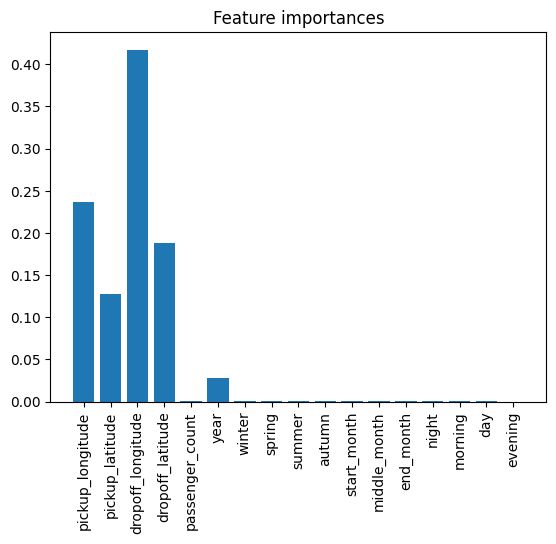

In [ ]:
importances = gs_dt.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X_train.columns, rotation='vertical')
plt.show()

In [ ]:
# ваш код здесь

### Quiz 

Какой из признаков, связанных с датой поездки, самый важный для модели?

year

## Кластеризация и визуализация

Оставьте только те строчки в таблице df (после удаления пропусков), для которых выполнены оба условия:

* `dropoff_latitude` $\in (39;41)$
* `dropoff_longitude` $\in (-75;-72)$

### Quiz

Сколько строк осталось в таблице?

In [5]:
new_df = df[(df.dropoff_latitude > 39) & (df.dropoff_latitude < 41) & (df.dropoff_longitude > -75) & (df.dropoff_longitude < -72)]

In [5]:
new_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2011-11-23 14:36:35.0000003,2011-11-23 14:36:35 UTC,-73.959075,40.783316,-73.959087,40.783345,1.0,2.5
1,2013-09-14 21:40:00.00000016,2013-09-14 21:40:00 UTC,-73.931612,40.771060,-73.929097,40.760542,1.0,5.5
2,2012-04-30 18:13:19.0000002,2012-04-30 18:13:19 UTC,-73.997929,40.740983,-74.007197,40.727725,2.0,6.5
3,2010-10-22 15:03:47.0000001,2010-10-22 15:03:47 UTC,-73.980608,40.742449,-73.985609,40.755807,1.0,6.5
4,2011-02-18 18:08:16.0000002,2011-02-18 18:08:16 UTC,-74.008884,40.720314,-73.983280,40.722350,1.0,12.1
...,...,...,...,...,...,...,...,...
615956,2013-12-01 00:21:40.0000001,2013-12-01 00:21:40 UTC,-73.979049,40.736143,-73.980528,40.730353,1.0,5.5
615957,2014-05-06 20:19:00.00000013,2014-05-06 20:19:00 UTC,-73.976600,40.745290,-73.980242,40.759672,2.0,10.5
615958,2012-01-31 00:16:00.00000042,2012-01-31 00:16:00 UTC,-73.987750,40.745760,-73.953092,40.776787,1.0,10.9
615959,2014-07-28 00:03:00.00000067,2014-07-28 00:03:00 UTC,-73.983165,40.728207,-74.002797,40.728670,1.0,7.5


Разбейте все поездки (исходные данные df) по признакам `dropoff_latitude`, `dropoff_longitude` на 5 кластеров.

Используйте kmeans c `random_state=42`.

Визуализируйте поездки из таблицы df в осях `dropoff_latitude`, `dropoff_longitude` - покрасьте точки в цвета, соответствующие кластерам.

In [ ]:
df.fare_amount.value_counts()

6.50      29712
4.50      25173
8.50      23182
5.30      18118
5.70      18098
          ...  
59.60         1
84.15         1
54.27         1
52.25         1
101.20        1
Name: fare_amount, Length: 1835, dtype: int64

In [2]:
!pip install sklearn numpy pandas seaborn matplotlib

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  
  If the previous advice does not cover your use 

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt   

ModuleNotFoundError: No module named 'sklearn'

In [2]:
df = pd.read_csv("https://www.dropbox.com/s/glmbcyopi24m2ni/final_project_data.csv?dl=1")

In [3]:
new_df = df[(df.dropoff_latitude > 39) & (df.dropoff_latitude < 41) & (df.dropoff_longitude > -75) & (df.dropoff_longitude < -72)]

In [4]:
vis_df = new_df[['dropoff_latitude', 'dropoff_longitude']]

In [5]:
clusters = KMeans(n_clusters=5, random_state=42).fit_predict(vis_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


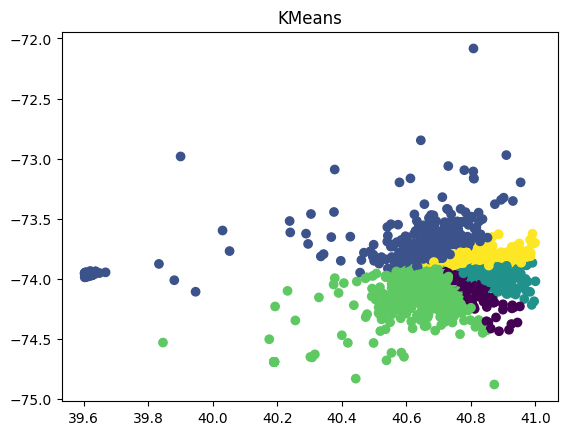

In [41]:
plt.scatter(vis_df.values[:,0], vis_df.values[:,1], c = clusters)
plt.title('KMeans')
plt.show();

In [11]:
len(clusters)

603729

In [12]:
vis_df.shape

(603729, 2)

In [14]:
vis_df.label.value_counts()

0    296406
2    143628
3    135924
4     20741
1      7030
Name: label, dtype: int64

In [30]:
vis_df

,dropoff_latitude,dropoff_longitude,label
0,40.783345,-73.959087,2
1,40.760542,-73.929097,2
2,40.727725,-74.007197,3
3,40.755807,-73.985609,0
4,40.722350,-73.983280,3
...,...,...,...
615956,40.730353,-73.980528,3
615957,40.759672,-73.980242,0
615958,40.776787,-73.953092,2
615959,40.728670,-74.002797,3


In [31]:
result_df = pd.concat([vis_df['label'], vis_df['fare_amount']], ignore_index=True,axis=1)

In [32]:
result_df.rename(columns={0:'label', 1:'fare_amount'}, inplace=True)

In [34]:
result_df.label.value_counts()

0.0    296406
2.0    143628
3.0    135924
4.0     20741
1.0      7030
Name: label, dtype: int64

In [35]:
result_df.sample(5)

,label,fare_amount
115493,2.0,24.0
58560,2.0,13.5
569744,NaN,6.0
586388,0.0,4.5
54070,0.0,11.0


### Quiz

Для каждого кластера вычислите среднюю стоимость поездки.

Чему равна самая большая средняя стоимость поездки по кластерам? Ответ округлите до целого числа.

In [19]:
result_df.groupby('label').mean()

,fare_amount
label,
0.0,9.575256
1.0,40.105171
2.0,10.326705
3.0,12.691351
4.0,23.927865


In [20]:
for el in range(5):
  print(el+1, result_df.fare_amount[result_df.label == el].mean())

1 9.575255595365816
2 40.10517069701281
3 10.326704542289804
4 12.691350828404108
5 23.927865098114843


In [7]:
vis_df

,dropoff_latitude,dropoff_longitude,label
0,40.783345,-73.959087,2
1,40.760542,-73.929097,2
2,40.727725,-74.007197,3
3,40.755807,-73.985609,0
4,40.722350,-73.983280,3
...,...,...,...
615956,40.730353,-73.980528,3
615957,40.759672,-73.980242,0
615958,40.776787,-73.953092,2
615959,40.728670,-74.002797,3


Отдельно нарисуйте кластер с наибольшей средней стоимостью поездки. В нем выделяется два островка.

In [9]:
bigger_df

,dropoff_latitude,dropoff_longitude,label
0,40.783345,-73.959087,2
1,40.760542,-73.929097,2
5,40.805453,-73.960058,2
6,40.774394,-73.951115,2
7,40.784550,-73.977298,2
...,...,...,...
615928,40.782139,-73.978180,2
615934,40.793016,-73.972887,2
615937,40.767472,-73.953243,2
615948,40.778148,-73.948575,2


In [11]:
vis_df.shape, bigger_df.shape

((603729, 3), (143628, 3))

array([-73.959087, -73.929097, -73.960058, ..., -73.953243, -73.948575,
       -73.953092])

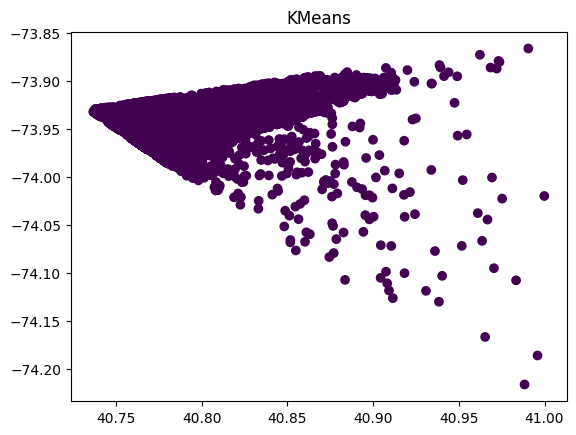

In [10]:
plt.scatter(bigger_df.values[:,0], bigger_df.values[:,1], c = bigger_df.values[:,2])
plt.title('KMeans')
plt.show();

### Quiz

Кластеризуйте точки этого кластера при помощи DBSCAN с гиперпараметрами `eps`=0.15, `min_samples`=10.

Нарисуйте результат.

Вычислите координаты центра (среднее арифметрическое) меньшего кластера. 

В ответе укажите `dropoff_latitude`, округленную до тысячных.

In [6]:
vis_df['label'] = clusters

<ipython-input-6-388fcac031cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis_df['label'] = clusters


In [7]:
bigger_df = vis_df[vis_df.label ==2]

In [9]:
del df
del vis_df
del new_df

In [18]:
bigger_df[['dropoff_latitude', 'dropoff_longitude']].values

array([[ 40.783345, -73.959087],
       [ 40.760542, -73.929097],
       [ 40.805453, -73.960058],
       ...,
       [ 40.767472, -73.953243],
       [ 40.778148, -73.948575],
       [ 40.776787, -73.953092]])

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.15, min_samples=10)
clusters = dbscan.fit_predict(bigger_df[['dropoff_latitude', 'dropoff_longitude']].values)
plt.scatter(bigger_df.values[:,0], bigger_df.values[:,1], bigger_df.values[:,2])
plt.show();

In [2]:
# bigger_df

# Часть 2

## Творческая (но обязательная) часть

В работе мы построили baseline-модель, потом попытались ее улучшить, усложнив пайплайн увеличением, а затем снижением размерности. Но попробовали мы лишь малую часть из всех возможных подходов, а также всего лишь одну модель - решающее дерево.

В этой части задания вам предлагается не ограничивать себя идеями, попробованными выше:
* придумывайте новые признаки 
* пробуйте разные кодировки признаков
* снижайте размерность и делайте отбор признаков
* пробуйте разные модели
* комбинируйте подходы

У вас есть знания целого курса для работы над задачей, ни в чем вас не ограничиваем!

Ваша цель - построить модель, дающую наилучший скор $R^2$ на тестовых данных (с фиксированным разбиением на train-test, указанным в коде ноутбука выше).

In [ ]:
# ваш код здесь

### Итоговый отчет

Результаты исследований, проведенных в творческой части задания, оформите в виде отчета. Отчет - это текстовый документ (желательно, google docs - чтобы мы могли при ревью оставлять в нем комментарии), не ноутбук!

В отчете по пунктам должны быть отражены ваши действия при решении задачи:

1) Какие подходы попробовали - перечислить, описать

2) Какие подходы сработали, какие нет

3) Какой пайплайн дал наилучший результат? Какого качества удалось добиться?

4) Интерпретация важности признаков для наилучшего пайплайна. Какие признаки оказались наиболее важны для модели, какие нет? Как вы думаете почему?

Отчет пишется в свободной форме. В отчет можно включать визуализации, если считаете нужным.

Удачи!